In [70]:
import pandas as pd

In [71]:
unlabeled = pd.read_csv("./data/unlabeled_data.csv")
labeled = pd.read_csv("./data/labeled_data.csv")

In [72]:
unlabeled["PART_NAME"].value_counts()

PART_NAME
SP2 CVR ROOF RACK CTR, LH         118071
SP2 CVR ROOF RACK CTR, RH         114977
SP2 CAP-ROOF RACK(사출)              68342
LX2 W/S SIDE MLD'G LH              40647
CN7 W/S SIDE MLD'G RH              27885
                                   ...  
FRANGE SHELL(고성능사양)                   18
FOR YP PAD LH                         10
BR2 COVER-ROOF RACK,RH(사출)             7
SK3 STANCHION-ROOF RACK RR, LH         1
SK3 STANCHION-ROOF RACK FR, RH         1
Name: count, Length: 81, dtype: int64

In [73]:
labeled["PART_NAME"].unique()

array(["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH",
       "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH",
       'SP2 CVR ROOF RACK CTR, RH', "JX1 W/S SIDE MLD'G RH"], dtype=object)

In [74]:
unlabeled["PART_NAME"].unique()

array(['SP2 CVR ROOF RACK CTR, RH', 'SP2 CVR ROOF RACK CTR, LH',
       'BR2 COVER-ROOF RACK,LH(사출)', 'CD SIDE MOLDING LH',
       'TM SIDE STEP TRIM LH', 'TM SIDE STEP TRIM RH',
       'SIDE-RR BUMPER SINGLE', 'SK3 PAD-ROOF RACK, LH',
       'SK3 SIDE RAIL-ROOF RACK, LH', 'SK3 SIDE RAIL-ROOF RACK, RH',
       'FOR YP SIDE STEP TRIM LH(사출)', 'FOR YP SIDE STEP TRIM RH(사출)',
       'JSN-CVR RR BPR UPR', 'SP2 PAD-ROOF RACK, LH',
       'UM SIDE STEP TRIM RH', 'UM SIDE STEP TRIM LH',
       'ON SIDE STEP PLATE, RH', 'SKID-FRT BUMPER',
       'SP2 CAP-ROOF RACK(사출)', 'BR2 SIDE RAIL-ROOF RACK,LH',
       'BR2 SIDE RAIL-ROOF RACK,RH', 'BR2 PAD-ROOF RACK,LH', 'X61G FRT',
       'SP2 PAD-ROOF RACK, RH', 'CD SIDE MOLDING RH', 'X61G RR',
       'PCV CAP SHELL(Gamma2-T)', 'SIDE-RR BUMPER DUAL',
       'SK3 CAP-ROOF RACK(사출)', "LX2 W/S SIDE MLD'G LH",
       'ON SIDE STEP PLATE, LH', "CD S/B MOLD'G W/S SIDE LH",
       "LX2 W/S SIDE MLD'G RH", 'FLANGE SHELL(Gamma2-T)',
       "JX1 W/S SIDE MLD'G LH

In [75]:
unlabeled[(unlabeled["PART_NAME"] == "CN7 W/S SIDE MLD'G RH")]["EQUIP_NAME"].unique()

array(['650톤-우진2호기', '550TON-도시바'], dtype=object)

In [76]:
cn7_unlabeled = unlabeled[(unlabeled["PART_NAME"] == "CN7 W/S SIDE MLD'G RH") | (unlabeled["PART_NAME"] == "CN7 W/S SIDE MLD'G LH")]
cn7_unlabeled = cn7_unlabeled[cn7_unlabeled["EQUIP_NAME"] == "650톤-우진2호기"]
cn7_labeled = labeled[(labeled["PART_NAME"] == "CN7 W/S SIDE MLD'G RH") | (labeled["PART_NAME"] == "CN7 W/S SIDE MLD'G LH")]

In [78]:
cn7_unlabeled = cn7_unlabeled[cn7_unlabeled["Clamp_Open_Position"] >200]

In [79]:
cn7_unlabeled = cn7_unlabeled.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD", "Clamp_Open_Position","Unnamed: 0", "PART_NAME", "PART_NO",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])
cn7_labeled = cn7_labeled.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD", "Clamp_Open_Position", "PART_NAME", "PassOrFail", "Reason",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])

In [80]:
cn7_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6736 entries, 0 to 7995
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Injection_Time            6736 non-null   float64
 1   Filling_Time              6736 non-null   float64
 2   Plasticizing_Time         6736 non-null   float64
 3   Cycle_Time                6736 non-null   float64
 4   Clamp_Close_Time          6736 non-null   float64
 5   Cushion_Position          6736 non-null   float64
 6   Plasticizing_Position     6736 non-null   float64
 7   Max_Injection_Speed       6736 non-null   float64
 8   Max_Screw_RPM             6736 non-null   float64
 9   Average_Screw_RPM         6736 non-null   float64
 10  Max_Injection_Pressure    6736 non-null   float64
 11  Max_Switch_Over_Pressure  6736 non-null   float64
 12  Max_Back_Pressure         6736 non-null   float64
 13  Average_Back_Pressure     6736 non-null   float64
 14  Barrel_Temper

In [81]:
cn7_unlabeled["PART_NAME"].unique()

KeyError: 'PART_NAME'

In [82]:
cn7_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33931 entries, 114610 to 777220
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ERR_FACT_QTY              33931 non-null  int64  
 1   Injection_Time            33931 non-null  float64
 2   Filling_Time              33931 non-null  float64
 3   Plasticizing_Time         33931 non-null  float64
 4   Cycle_Time                33931 non-null  float64
 5   Clamp_Close_Time          33931 non-null  float64
 6   Cushion_Position          33931 non-null  float64
 7   Plasticizing_Position     33931 non-null  float64
 8   Max_Injection_Speed       33931 non-null  float64
 9   Max_Screw_RPM             33931 non-null  float64
 10  Average_Screw_RPM         33931 non-null  float64
 11  Max_Injection_Pressure    33931 non-null  float64
 12  Max_Switch_Over_Pressure  33931 non-null  float64
 13  Max_Back_Pressure         33931 non-null  float64
 14  Avera

In [83]:
cn7_unlabeled["ERR_FACT_QTY"].mean()

22.883528336919042

In [84]:
cn7_unlabeled["ERR_FACT_QTY"].value_counts()

ERR_FACT_QTY
0      4695
13     3693
2      3457
10     2671
130    2275
6      2157
12     2086
1      1843
9      1515
29     1450
22     1438
36     1437
5      1220
16     1203
154    1065
8       397
3       389
14      373
25      210
50      163
7        96
44       16
15       15
61       15
96       12
75        9
321       8
11        7
4         5
17        4
120       4
23        1
118       1
188       1
Name: count, dtype: int64

In [85]:
tmp = cn7_unlabeled[(cn7_unlabeled["Cycle_Time"] > 59) & (cn7_unlabeled["Cycle_Time"] < 60)]

In [86]:
from sklearn.model_selection import train_test_split
X = tmp.drop(columns=["ERR_FACT_QTY"])
y = tmp["ERR_FACT_QTY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8545, 23), (3663, 23), (8545,), (3663,))

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.3, random_state=42)

In [88]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)
val_pred = model.predict(X_val_scaled)
r2 = r2_score(y_val, val_pred)
mae = mean_absolute_error(y_val, val_pred)
mse = mean_squared_error(y_val, val_pred)
print(mae, mse, r2)


# 각 독립변수의 계수와 절편 확인
print("회귀계수:", model.coef_)    # 각 독립변수에 대한 계수 출력
print("절편:", model.intercept_)   # 상수항(절편) 출력

7.392280978549886 83.55438884382933 0.48203954523276926
회귀계수: [ -1.44019426   0.30752635  -2.2629452    0.1117157    0.40195489
  -0.03999626  -6.67937009  -2.46790301   0.25094788   0.28146586
   0.70391707   1.78367061 -10.64303585   1.37202844   0.58611286
   0.32215721  -1.67977657   1.38786426   0.0294493   -0.32528245
   0.59316882 -15.47993228  18.05171585]
절편: 13.40678816251361


In [90]:

# 모델 학습 후 회귀계수 획득 (이미 model.fit()을 수행했다고 가정)
coefficients = model.coef_

# 독립변수와 회귀계수로 DataFrame 생성
df_coeff = pd.DataFrame({'독립변수': X.columns, '회귀계수': coefficients, "제곱" : coefficients * coefficients})

# 회귀계수를 기준으로 내림차순 정렬 (가장 큰 영향력부터 보고자 할 때)
df_coeff_sorted = df_coeff.sort_values(by='제곱', ascending=False)

df_coeff_sorted

,독립변수,회귀계수,제곱
22,Mold_Temperature_4,18.051716,325.864445
21,Mold_Temperature_3,-15.479932,239.628303
12,Max_Back_Pressure,-10.643036,113.274212
6,Plasticizing_Position,-6.679370,44.613985
7,Max_Injection_Speed,-2.467903,6.090545
2,Plasticizing_Time,-2.262945,5.120921
11,Max_Switch_Over_Pressure,1.783671,3.181481
16,Barrel_Temperature_3,-1.679777,2.821649
0,Injection_Time,-1.440194,2.074159
17,Barrel_Temperature_4,1.387864,1.926167


In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 여러 회귀 모델을 딕셔너리에 저장합니다.
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "GBRegressor": GradientBoostingRegressor(),
    "HGBRegressor": HistGradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
}

results = []  # 평가 결과를 저장할 리스트

# 각 모델에 대해 학습 및 예측, 평가 지표 계산을 진행합니다.
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    
    results.append({
        "Model": model_name,
        "R2": r2,
        "MAE": mae,
        "MSE": mse
    })

# 결과를 데이터프레임으로 정리하여 출력합니다.
results_df = pd.DataFrame(results)
print("모델 성능 비교:")
print(results_df)

# 예를 들어, R² 지표가 가장 높은 모델을 선택하는 방법 (높을수록 설명력이 좋음)
best_model_row = results_df.loc[results_df["R2"].idxmax()]
print("\n최종 선정된 모델 (R2 기준):")
print(best_model_row)


모델 성능 비교:
              Model        R2       MAE         MSE
0  LinearRegression  0.482040  7.392281   83.554389
1             Ridge  0.481769  7.390914   83.598052
2             Lasso  0.457452  7.418927   87.520651
3      DecisionTree  0.077064  8.733424  148.882703
4      RandomForest  0.408944  7.656910   95.345749
5               SVR  0.453841  6.422364   88.103168
6       GBRegressor  0.620107  6.275817   61.282141
7      HGBRegressor  0.543858  6.737058   73.582171
8      XGBRegressor  0.378881  7.694338  100.195340

최종 선정된 모델 (R2 기준):
Model    GBRegressor
R2          0.620107
MAE         6.275817
MSE        61.282141
Name: 6, dtype: object


In [92]:
temp = tmp.copy()

In [93]:
tmp["ERR_FACT_QTY"].value_counts()

ERR_FACT_QTY
1     1840
6     1442
29    1440
22    1430
36    1429
0     1428
16    1196
5     1182
2      418
10     370
44      16
61      15
11       1
7        1
Name: count, dtype: int64

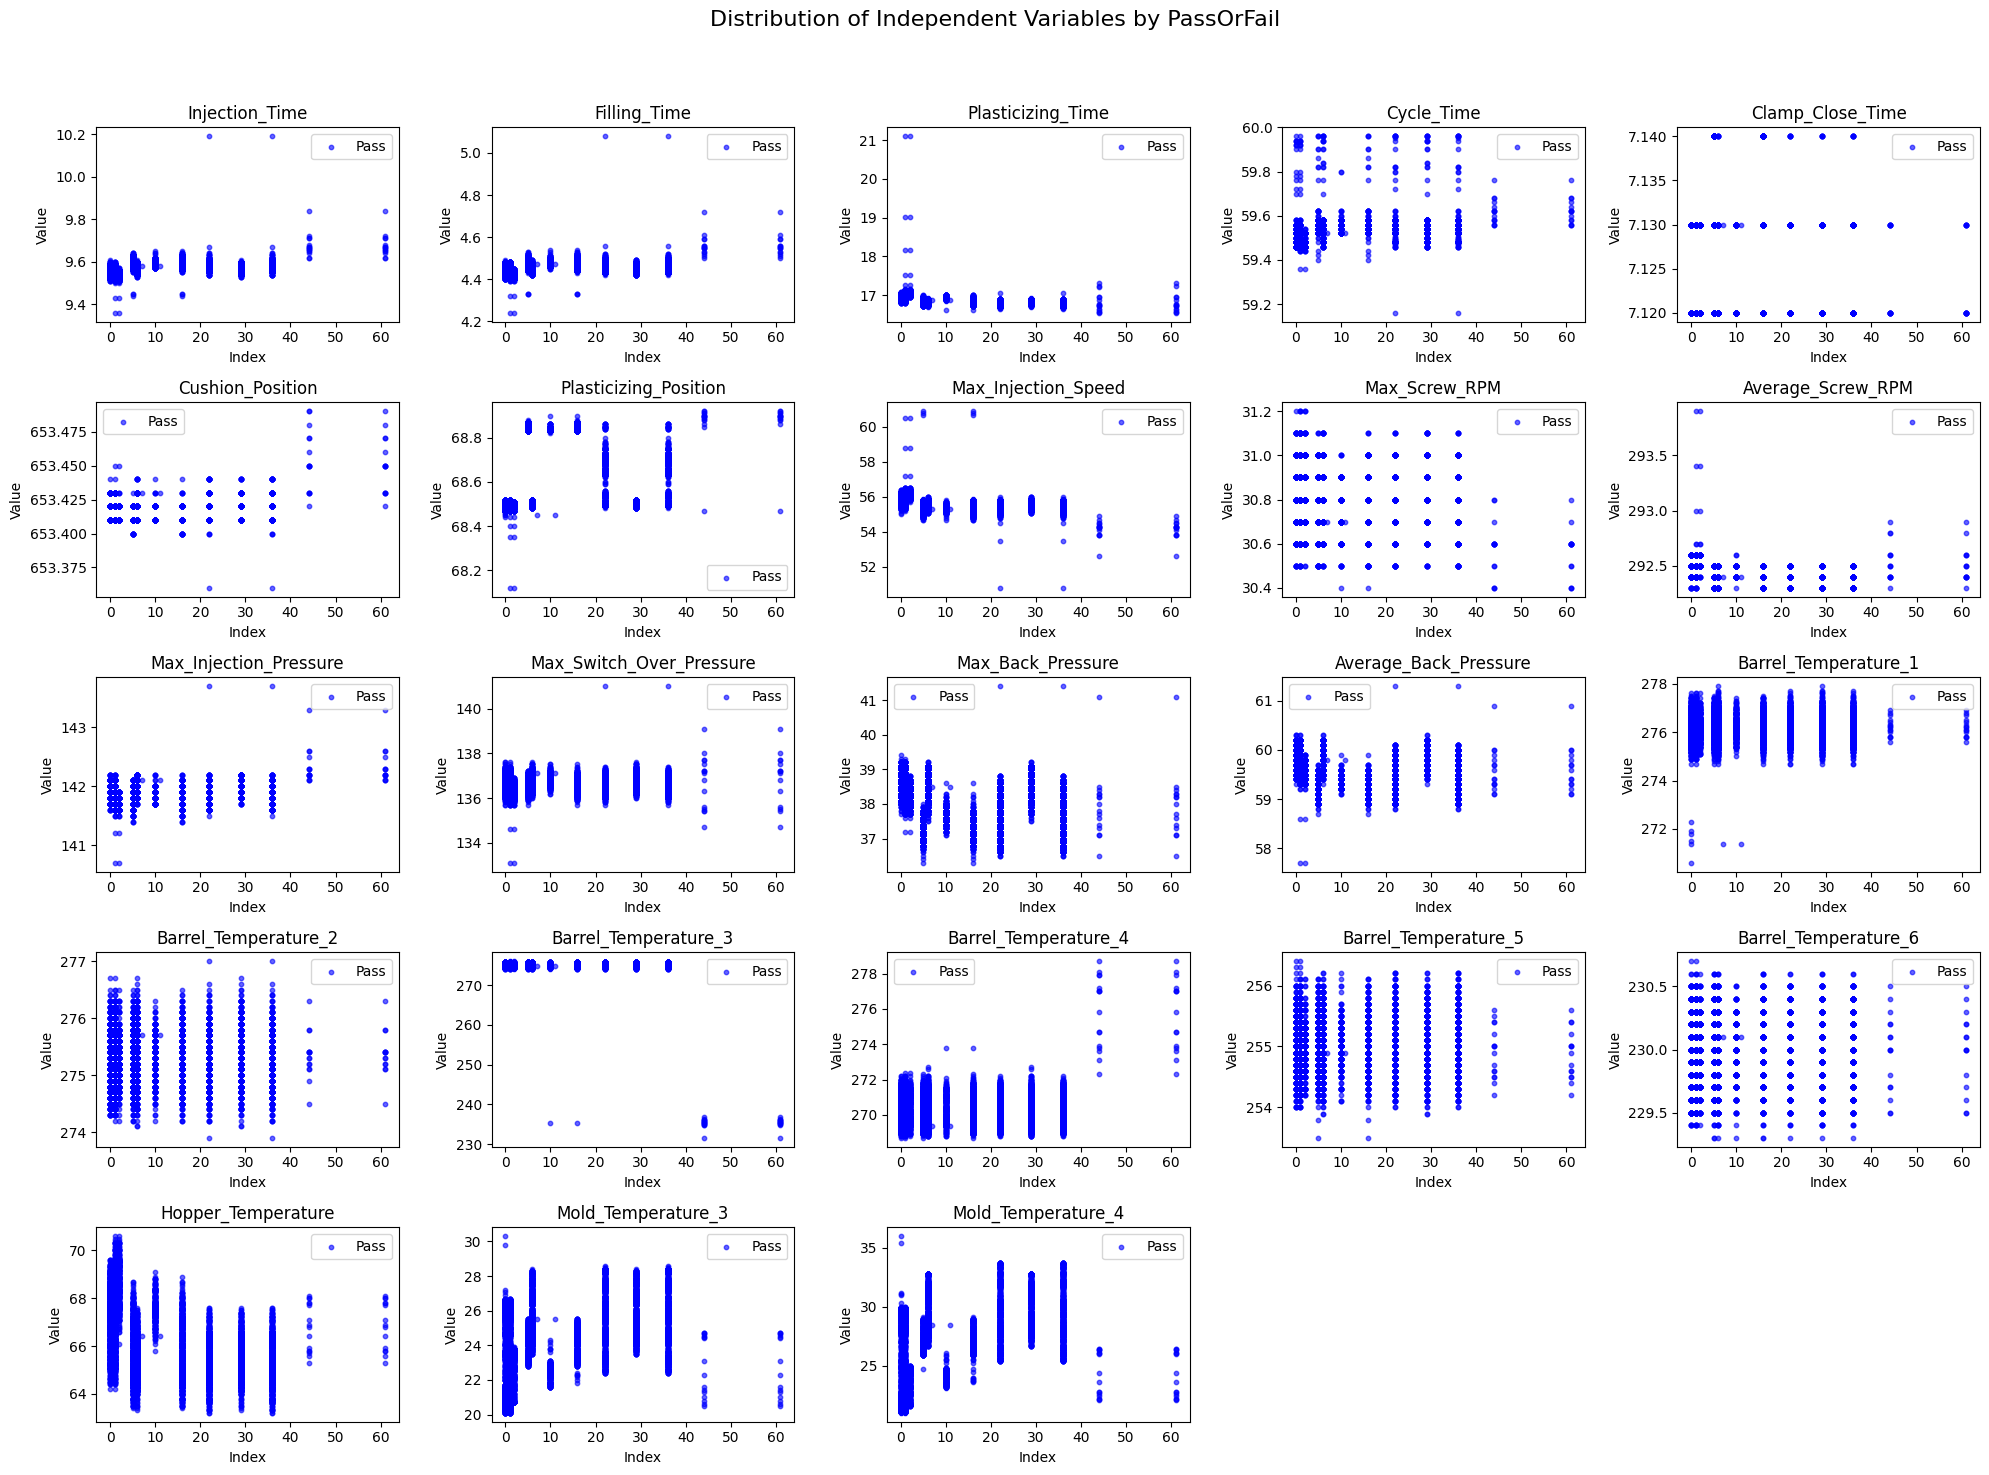

In [94]:

# 독립 변수와 종속 변수 분리
X = temp.drop(columns=["ERR_FACT_QTY"])
y = temp["ERR_FACT_QTY"]

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(y, X[column], label="Pass", color="blue", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()